# =======================
# Part 1: Merge data from CSVs
# =======================

We have two files:
- `customer_details.csv` with one row per customer, details about age and subscription, and the churn yes/no label
- `churn_details_per_customer.csv` with one row per customer, but more details about why they churned, which is interesting for us

We need to merge them in the same Dataframe to use it properly

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

print("✓ NumPy version:", np.__version__)
print("✓ Pandas version:", pd.__version__)
print("✓ Scikit-Learn version:", sklearn.__version__)

✓ NumPy version: 2.3.4
✓ Pandas version: 2.3.3
✓ Scikit-Learn version: 1.7.2


In [64]:
# Get the csv with decimal=',' because the float numbers are with commas
customer_dataframe = pd.read_csv('./data/customer_details.csv', decimal=',', delimiter=';')
churn_details_dataframe = pd.read_csv('./data/churn_details_per_customer.csv')

customer_dataframe.head(10)

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,"29,85",No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,"1889,5",No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,"108,15",Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,"1840,75",No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,"151,65",Yes
5,160192,9305-CDSKC,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,"820,5",Yes
6,680623,1452-KIOVK,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,"1949,4",No
7,340874,6713-OKOMC,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,"301,9",No
8,582674,7892-POOKP,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,"3046,05",Yes
9,303784,6388-TABGU,No,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,"3487,95",No


In [57]:
churn_details_dataframe.head(10)

,Status ID,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,SWSORB1252,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,SNAEQA8572,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,LMBQNN3714,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,VRZYZI9978,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,FDNAKX1688,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges
5,YZFIXL5823,4412-YLTKF,1,Q3,1,Churned,Yes,1,95,4638,Competitor,Competitor had better devices
6,KSGHEG1626,0390-DCFDQ,1,Q3,2,Churned,Yes,1,76,3964,Other,Don't know
7,PABMTY8825,3445-HXXGF,1,Q3,1,Churned,Yes,1,91,5444,Dissatisfaction,Service dissatisfaction
8,YAMNBI7178,2656-FMOKZ,1,Q3,2,Churned,Yes,1,91,5717,Dissatisfaction,Limited range of services
9,GIFMGB8144,2070-FNEXE,1,Q3,2,Churned,Yes,1,81,4419,Price,Lack of affordable download/upload speed


Merge the two datasets and see if the number of rows are the same, and if the churn label doesn't changed

In [58]:
# first used Dataframe.join but it didn't merged by key like in the documentation. 
# pd.merge work perfectly
merged_dataframe = pd.merge(customer_dataframe, churn_details_dataframe, on='Customer ID' , how='inner')

print(customer_dataframe.describe())
print(customer_dataframe.head(10))
print(churn_details_dataframe.describe())
print(churn_details_dataframe.head(10))

print(merged_dataframe.describe())
merged_dataframe.head(10)

           LoyaltyID       Tenure  Monthly Charges
count    7043.000000  7043.000000      7043.000000
mean   550382.651001    32.371149        64.761692
std    260776.118690    24.559481        30.090047
min    100346.000000     0.000000        18.250000
25%    323604.500000     9.000000        35.500000
50%    548704.000000    29.000000        70.350000
75%    776869.000000    55.000000        89.850000
max    999912.000000    72.000000       118.750000
   LoyaltyID Customer ID Senior Citizen Partner Dependents  Tenure  \
0     318537  7590-VHVEG             No     Yes         No       1   
1     152148  5575-GNVDE             No      No         No      34   
2     326527  3668-QPYBK             No      No         No       2   
3     845894  7795-CFOCW             No      No         No      45   
4     503388  9237-HQITU             No      No         No       2   
5     160192  9305-CDSKC             No      No         No       8   
6     680623  1452-KIOVK             No      No    

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn,Status ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,"29,85",No,GODTMI5747,1,Q3,3,Joined,No,0,27,3964,NaN,NaN
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,"1889,5",No,JXJTVI9837,1,Q3,3,Stayed,No,0,61,3441,NaN,NaN
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,"108,15",Yes,SUDNGT6444,1,Q3,1,Churned,Yes,1,86,3239,Competitor,Competitor made better offer
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,"1840,75",No,RJWCXJ6879,1,Q3,3,Stayed,No,0,66,4307,NaN,NaN
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,"151,65",Yes,KZSZDV8891,1,Q3,2,Churned,Yes,1,67,2701,Other,Moved
5,160192,9305-CDSKC,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,"820,5",Yes,EPTIUU1269,1,Q3,3,Churned,Yes,1,86,5372,Other,Moved
6,680623,1452-KIOVK,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,"1949,4",No,VNESFB2527,1,Q3,4,Stayed,No,0,43,4459,NaN,NaN
7,340874,6713-OKOMC,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,"301,9",No,OMMXZO3399,1,Q3,3,Stayed,No,0,51,2013,NaN,NaN
8,582674,7892-POOKP,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,"3046,05",Yes,PAJIVH8196,1,Q3,3,Churned,Yes,1,84,5003,Other,Moved
9,303784,6388-TABGU,No,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,"3487,95",No,VUPSJJ9678,1,Q3,4,Stayed,No,0,58,4529,NaN,NaN


# =======================
# Part 2: Data cleaning
# =======================

## Remove the columns that doesn't fit to the initial need

The initial dataset is about telecom customers and some data are referred to their phone and internet consumption, services subscribed and so on.

As in our context we are in a consultant-client B2B AI context, **we don't need data that only refers to phone and internet services**.

Those kind of data will never be entered by the consultants so they will not be relevant for our agent.

We will see further if some columns are problematic for the agent itself then.

In [59]:
pd.set_option('display.max_columns', None)
print(merged_dataframe["Quarter"].unique())
print(merged_dataframe["Status ID"].count())
merged_dataframe.head(10)

['Q3']
7043


,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn,Status ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,"29,85",No,GODTMI5747,1,Q3,3,Joined,No,0,27,3964,NaN,NaN
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,"1889,5",No,JXJTVI9837,1,Q3,3,Stayed,No,0,61,3441,NaN,NaN
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,"108,15",Yes,SUDNGT6444,1,Q3,1,Churned,Yes,1,86,3239,Competitor,Competitor made better offer
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,"1840,75",No,RJWCXJ6879,1,Q3,3,Stayed,No,0,66,4307,NaN,NaN
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,"151,65",Yes,KZSZDV8891,1,Q3,2,Churned,Yes,1,67,2701,Other,Moved
5,160192,9305-CDSKC,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,"820,5",Yes,EPTIUU1269,1,Q3,3,Churned,Yes,1,86,5372,Other,Moved
6,680623,1452-KIOVK,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,"1949,4",No,VNESFB2527,1,Q3,4,Stayed,No,0,43,4459,NaN,NaN
7,340874,6713-OKOMC,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,"301,9",No,OMMXZO3399,1,Q3,3,Stayed,No,0,51,2013,NaN,NaN
8,582674,7892-POOKP,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,"3046,05",Yes,PAJIVH8196,1,Q3,3,Churned,Yes,1,84,5003,Other,Moved
9,303784,6388-TABGU,No,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,"3487,95",No,VUPSJJ9678,1,Q3,4,Stayed,No,0,58,4529,NaN,NaN


In [60]:
merged_dataframe.drop(
    columns=[
            "Partner", # If the customer have a partner or not
            "Dependents", # If family members lives with the customer
            "Phone Service",
            "Multiple Lines", # multiple phone lines
            "Internet Service",
            "Online Security", # Online Security extra subscription
            "Online Backup", # Online Backup extra subscription
            "Device Protection", # Device Protection extra subscription
            "Tech Support", # Tech support extra subscription
            "Streaming TV", # If customer watch streaming TV
            "Streaming Movies", # If customer watch streaming Movies
            "Paperless Billing" # If customer chose the paperless billing option
        ],
        inplace=True
    )

merged_dataframe.head(10)

,LoyaltyID,Customer ID,Senior Citizen,Tenure,Contract,Payment Method,Monthly Charges,Total Charges,Churn,Status ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,318537,7590-VHVEG,No,1,Month-to-month,Electronic check,29.85,"29,85",No,GODTMI5747,1,Q3,3,Joined,No,0,27,3964,NaN,NaN
1,152148,5575-GNVDE,No,34,One year,Mailed check,56.95,"1889,5",No,JXJTVI9837,1,Q3,3,Stayed,No,0,61,3441,NaN,NaN
2,326527,3668-QPYBK,No,2,Month-to-month,Mailed check,53.85,"108,15",Yes,SUDNGT6444,1,Q3,1,Churned,Yes,1,86,3239,Competitor,Competitor made better offer
3,845894,7795-CFOCW,No,45,One year,Bank transfer (automatic),42.30,"1840,75",No,RJWCXJ6879,1,Q3,3,Stayed,No,0,66,4307,NaN,NaN
4,503388,9237-HQITU,No,2,Month-to-month,Electronic check,70.70,"151,65",Yes,KZSZDV8891,1,Q3,2,Churned,Yes,1,67,2701,Other,Moved
5,160192,9305-CDSKC,No,8,Month-to-month,Electronic check,99.65,"820,5",Yes,EPTIUU1269,1,Q3,3,Churned,Yes,1,86,5372,Other,Moved
6,680623,1452-KIOVK,No,22,Month-to-month,Credit card (automatic),89.10,"1949,4",No,VNESFB2527,1,Q3,4,Stayed,No,0,43,4459,NaN,NaN
7,340874,6713-OKOMC,No,10,Month-to-month,Mailed check,29.75,"301,9",No,OMMXZO3399,1,Q3,3,Stayed,No,0,51,2013,NaN,NaN
8,582674,7892-POOKP,No,28,Month-to-month,Electronic check,104.80,"3046,05",Yes,PAJIVH8196,1,Q3,3,Churned,Yes,1,84,5003,Other,Moved
9,303784,6388-TABGU,No,62,One year,Bank transfer (automatic),56.15,"3487,95",No,VUPSJJ9678,1,Q3,4,Stayed,No,0,58,4529,NaN,NaN


We can now see some random identifiers and strings used to describe numerical data (like `Churn Label` telling that 1 = Yes and 0 = No for `Churn Value`).

For an AI agent, it is duplicate and irrelevent, let's remove it.

We only need to know a unique id for the customer and one churn label in a numerical shape.

In [61]:
merged_dataframe.drop(
    columns=[
            "Churn Label", # Duplicate of "Churn Value"
            "Churn", # Duplicate of "Churn Value"
            "Count", # Always equal to 1
            "LoyaltyID", # Duplicate for "Customer ID_Customer"
            "Status ID", # Duplicate for "Customer ID_Customer"
            "Quarter", # Always equal to "Q3"            
        ],
        inplace=True
    )

merged_dataframe.head(10)

,Customer ID,Senior Citizen,Tenure,Contract,Payment Method,Monthly Charges,Total Charges,Satisfaction Score,Customer Status,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,7590-VHVEG,No,1,Month-to-month,Electronic check,29.85,"29,85",3,Joined,0,27,3964,NaN,NaN
1,5575-GNVDE,No,34,One year,Mailed check,56.95,"1889,5",3,Stayed,0,61,3441,NaN,NaN
2,3668-QPYBK,No,2,Month-to-month,Mailed check,53.85,"108,15",1,Churned,1,86,3239,Competitor,Competitor made better offer
3,7795-CFOCW,No,45,One year,Bank transfer (automatic),42.30,"1840,75",3,Stayed,0,66,4307,NaN,NaN
4,9237-HQITU,No,2,Month-to-month,Electronic check,70.70,"151,65",2,Churned,1,67,2701,Other,Moved
5,9305-CDSKC,No,8,Month-to-month,Electronic check,99.65,"820,5",3,Churned,1,86,5372,Other,Moved
6,1452-KIOVK,No,22,Month-to-month,Credit card (automatic),89.10,"1949,4",4,Stayed,0,43,4459,NaN,NaN
7,6713-OKOMC,No,10,Month-to-month,Mailed check,29.75,"301,9",3,Stayed,0,51,2013,NaN,NaN
8,7892-POOKP,No,28,Month-to-month,Electronic check,104.80,"3046,05",3,Churned,1,84,5003,Other,Moved
9,6388-TABGU,No,62,One year,Bank transfer (automatic),56.15,"3487,95",4,Stayed,0,58,4529,NaN,NaN


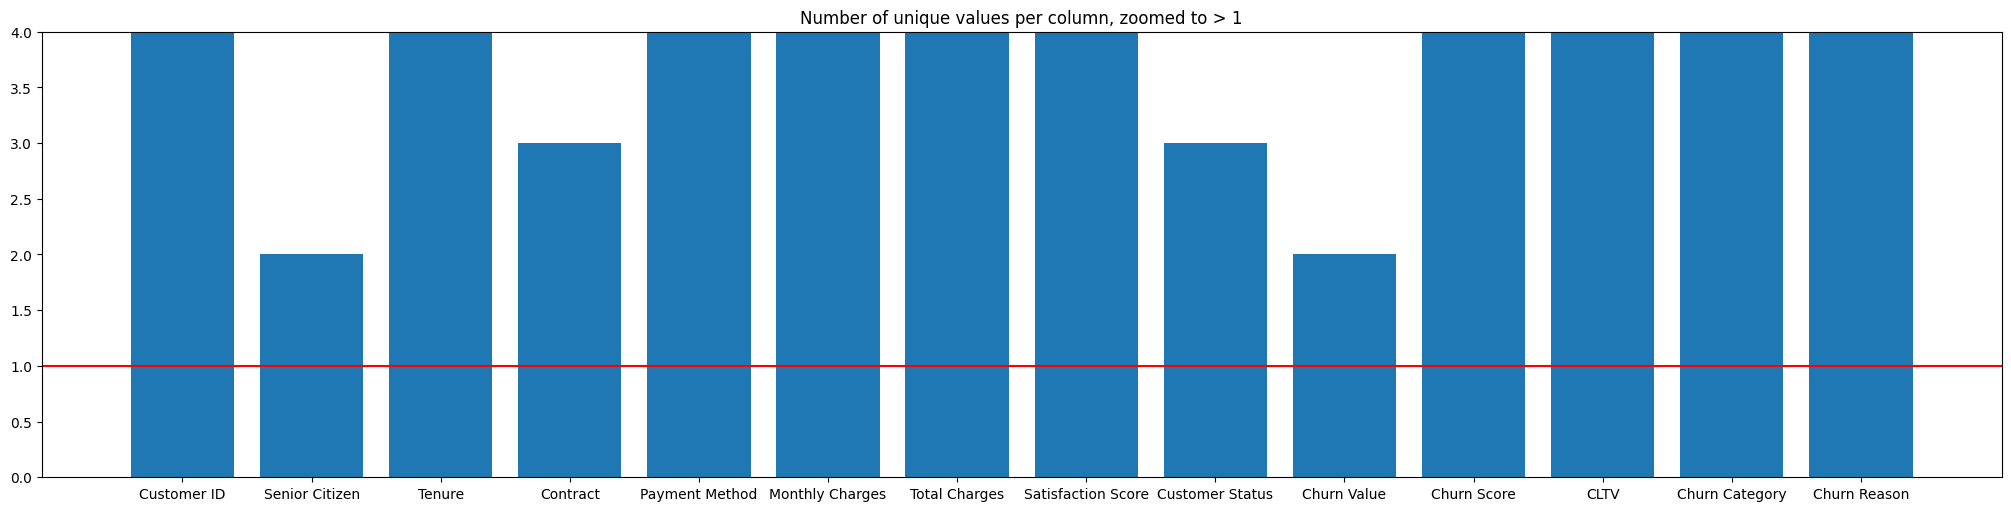

Customer ID           7043
Senior Citizen           2
Tenure                  73
Contract                 3
Payment Method           4
Monthly Charges       1585
Total Charges         6531
Satisfaction Score       5
Customer Status          3
Churn Value              2
Churn Score             81
CLTV                  3438
Churn Category           5
Churn Reason            20
dtype: int64


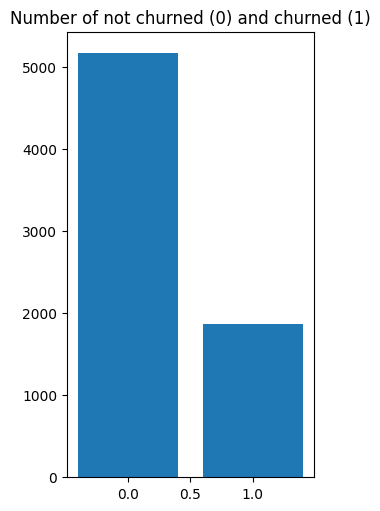

Churn Value
0    5174
1    1869
Name: count, dtype: int64
in percents:
Churn Value
0    0.73463
1    0.26537
Name: proportion, dtype: float64


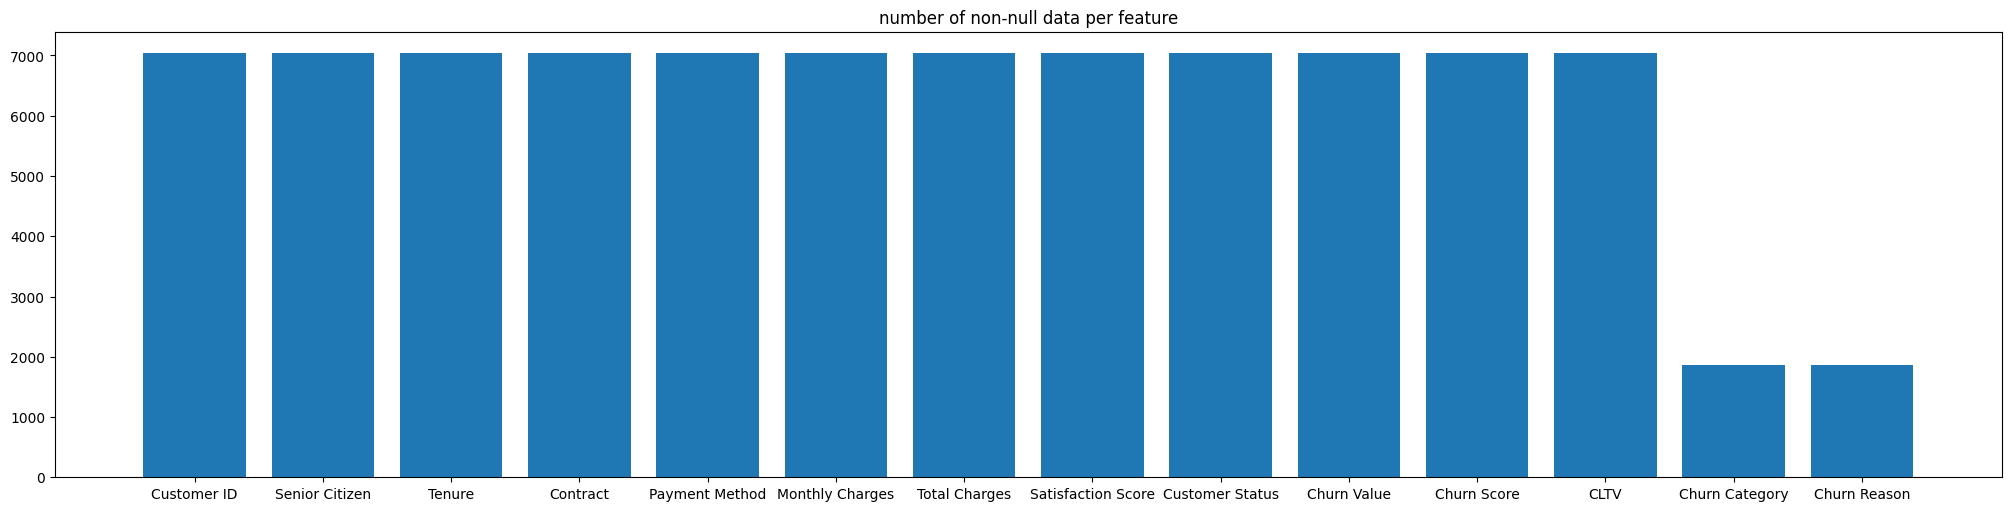

Customer ID           7043
Senior Citizen        7043
Tenure                7043
Contract              7043
Payment Method        7043
Monthly Charges       7043
Total Charges         7043
Satisfaction Score    7043
Customer Status       7043
Churn Value           7043
Churn Score           7043
CLTV                  7043
Churn Category        1869
Churn Reason          1869
dtype: int64
7043


In [62]:
count_all_unique_values = merged_dataframe.nunique()
fig, ax = plt.subplots(figsize=(20, 5), layout='constrained')
ax.set_title('Number of unique values per column, zoomed to > 1')
ax.axhline(1, color='red')
categories = count_all_unique_values.index
ax.bar(categories, count_all_unique_values.values)
plt.ylim(0,4)
plt.show()
print(merged_dataframe.nunique())
print("=================")

churn_value_counts = merged_dataframe["Churn Value"].value_counts()
fig2, ax2 = plt.subplots(figsize=(3, 5), layout='constrained')
ax2.set_title('Number of not churned (0) and churned (1)')
categories = churn_value_counts.index
ax2.bar(categories, churn_value_counts.values)
plt.show()
print(churn_value_counts)
print("in percents:")
print(merged_dataframe["Churn Value"].value_counts(normalize=True))
print("=================")

fig3, ax3 = plt.subplots(figsize=(20, 5), layout='constrained')
ax3.set_title('number of non-null data per feature')
categories = merged_dataframe.columns
ax3.bar(categories, merged_dataframe.count())
plt.show()
print(merged_dataframe.count())
print("=================")

print(merged_dataframe["Total Charges"].count())

The churn Yes/No are not equal in proportions (73% of Yes versus 27% of No), which can be good if we want to predict only a stayed person, but we want to predict if a client have churned or not.

Let's see how we can balance it.

In [63]:

print(merged_dataframe["Satisfaction Score"].value_counts())
print('=============================')
print(merged_dataframe["Customer Status"].value_counts())
print('=============================')
print(merged_dataframe["Senior Citizen"].value_counts())
print('=============================')

merged_dataframe['Senior Citizen'] = merged_dataframe['Senior Citizen'].apply(lambda x: 1 if x == 'Yes' else 0)

print(merged_dataframe["Senior Citizen"].value_counts())
print('=============================')
print(merged_dataframe["Total Charges"].dtypes)
print(merged_dataframe["Total Charges"].count())
print('==============')
#test_total_charges = merged_dataframe['Total Charges'].convert_objects(convert_numeric=True)
#print(test_total_charges.dtypes)
#print(merged_dataframe["Total Charges"].count())
#print('==============')
#print(test_total_charges.count())
#print('==============')

#numerical_dataframe = merged_dataframe[['Senior Citizen', 'Tenure', 'Monthly Charges', 'Total Charges', 'Satisfaction Score', 'Churn Value', 'Churn Score', 'CLTV']]
#correlation_matrix = numerical_dataframe.corr()
#display(correlation_matrix)

balanced_dataframe = merged_dataframe.copy()

Satisfaction Score
3    2665
4    1789
5    1149
1     922
2     518
Name: count, dtype: int64
Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64
Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64
Senior Citizen
0    5901
1    1142
Name: count, dtype: int64
object
7043


# =======================
# Part 3: Pre-processing
# =======================

1. Handle missing data
2. Normalize them
3. Encoding Categorical Variables
4. Split data (train/test)